In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [2]:
# Load the dataset
df = pd.read_csv('titanic.csv.zip')

# Show the first 5 rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get basic information about data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Number of rows and columns
df.shape


(891, 12)

In [5]:
# Count missing values per column
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Summary statistics for numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get all column names
print("Column Names:", df.columns.tolist())

# Get data types of each column
print("\nData Types:")
print(df.dtypes)


Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-8-3135688688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
df['Fare'].fillna(df['Fare'].mean())

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [13]:
# Fill missing Embarked values with the mode (most frequent)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check the number of missing values in 'Embarked' after filling
print("\nMissing values in 'Embarked' after filling:")
print(df['Embarked'].isnull().sum())


Missing values in 'Embarked' after filling:
0


In [15]:
# Fill missing Cabin values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Check the number of missing values in 'Cabin' after filling
print("\nMissing values in 'Cabin' after filling:")
print(df['Cabin'].isnull().sum())

# Show the first 5 rows of the dataset to see the changes
print("\nFirst 5 rows after filling missing Cabin values:")
display(df.head())


Missing values in 'Cabin' after filling:
0

First 5 rows after filling missing Cabin values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [16]:
# Confirm that there are no missing values left
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
# Find object (string) type columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols.tolist())


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
# Drop Name and Ticket if not planning feature engineering
df.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [19]:
# Convert 'Sex' to 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [20]:
# One-hot encode 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


In [21]:
# Optional: One-hot encode Pclass
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
df = pd.concat([df, pclass_dummies], axis=1)
df.drop('Pclass', axis=1, inplace=True)


In [22]:
# Extract first letter of Cabin
df['Cabin'] = df['Cabin'].str[0]

# One-hot encode simplified cabin
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin', drop_first=True)
df = pd.concat([df, cabin_dummies], axis=1)
df.drop('Cabin', axis=1, inplace=True)


In [23]:
# Final overview
print(df.head())
print(df.dtypes)


   PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0            1         0    0  22.0      1      0   7.2500       False   
1            2         1    1  38.0      1      0  71.2833       False   
2            3         1    1  26.0      0      0   7.9250       False   
3            4         1    1  35.0      1      0  53.1000       False   
4            5         0    0  35.0      0      0   8.0500       False   

   Embarked_S  Pclass_2  Pclass_3  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0        True     False      True    False    False    False    False   
1       False     False     False    False     True    False    False   
2        True     False      True    False    False    False    False   
3        True     False     False    False     True    False    False   
4        True     False      True    False    False    False    False   

   Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0    False    False    False     True  
1    False    False    False    Fals

In [24]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns to scale:", numeric_cols)


Numerical columns to scale: ['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [25]:
# Drop target column from scaling
numeric_cols.remove('Survived')


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
minmax_scaler = MinMaxScaler()

# Fit and transform
df[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])


In [29]:
# View statistics to confirm scaling
df[numeric_cols].describe()


,PassengerId,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.352413,0.363679,0.065376,0.063599,0.062858
std,0.289162,0.477990,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,0.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [27]:
# View statistics to confirm scaling
df[numeric_cols].describe()


,PassengerId,Sex,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,3.987333e-17,2.272780e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.376951e-01,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-8.650540e-01,-7.376951e-01,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-7.376951e-01,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,8.650540e-01,1.355574e+00,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.730108e+00,1.355574e+00,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [31]:
# Reuse the numeric columns list from earlier
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Survived' in numeric_cols:
    numeric_cols.remove('Survived')
print("Columns to check for outliers:", numeric_cols)


Columns to check for outliers: ['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


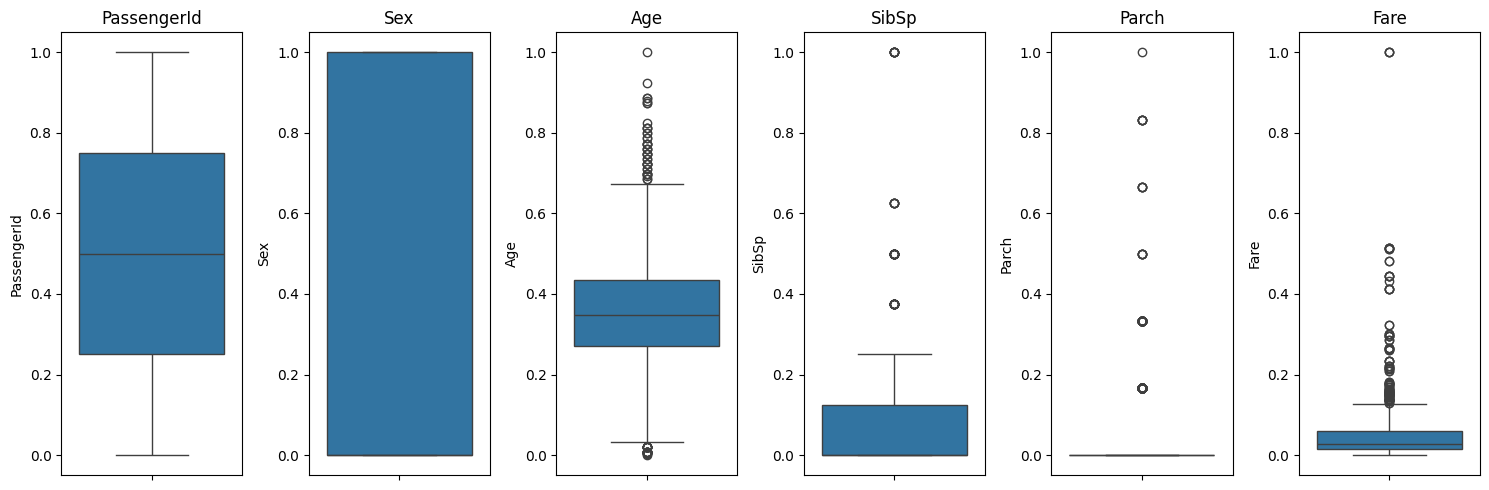

In [32]:
# Plot boxplots for all numeric features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [33]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [34]:
# Copy the dataframe to avoid altering original
df_clean = df.copy()

# Apply outlier removal
for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

# Show new shape
print("Original dataset shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original dataset shape: (891, 19)
After outlier removal: (561, 19)


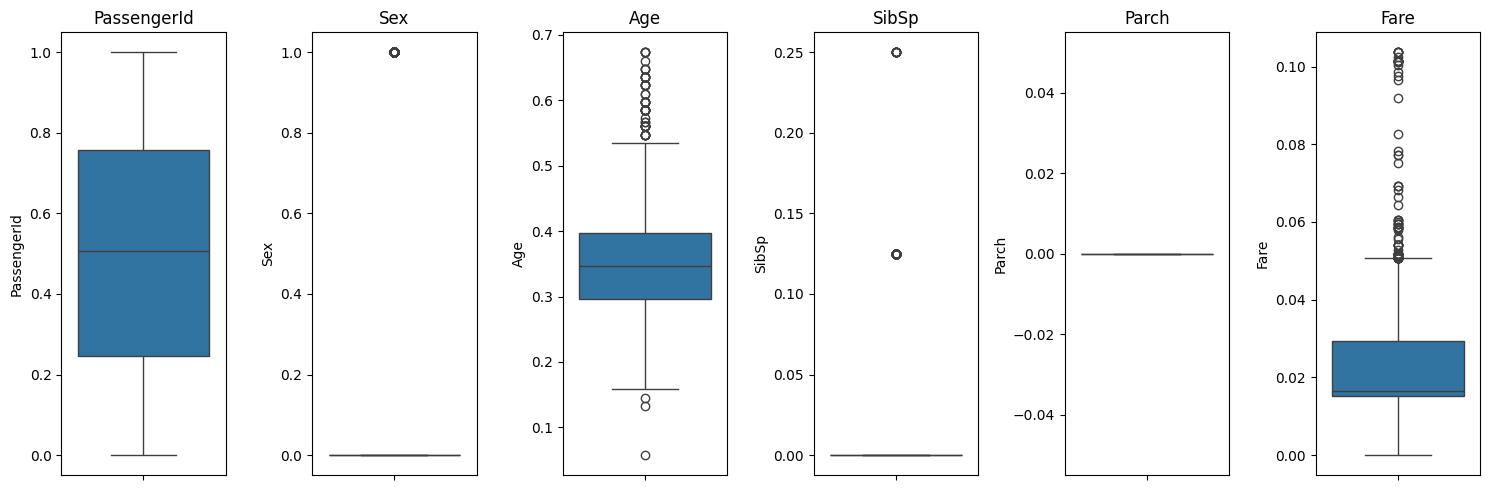

In [35]:
# Boxplots again to confirm outliers are gone
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()
